In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
bank_data = pd.read_csv('bank-full.csv',sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data understanding

In [3]:
bank_data.shape

(45211, 17)

In [4]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
for col in bank_data.select_dtypes(include='object').columns:
    print (col)
    print (bank_data[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [8]:
bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [9]:
bank_data[bank_data['poutcome']=='unknown'].shape[0]

36959

In [10]:
36959/45211 * 100

81.74780473778506

### Remove poutcome feature because more unknown values

In [11]:
del bank_data['poutcome']

In [12]:
bank_data[bank_data['contact']=='unknown'].shape[0]

13020

In [13]:
13020/45211 * 100

28.798301298356595

### Remove contact feature because more unknown values

In [14]:
del bank_data['contact']

In [15]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [16]:
bank_data[bank_data['job']=='unknown'].shape[0]

288

In [17]:
bank_data['job'].replace(to_replace='unknown',value=np.nan,inplace=True)

In [18]:
bank_data.dropna(inplace=True)

In [19]:
bank_data.shape

(44923, 15)

In [20]:
bank_data[bank_data['education']=='unknown'].shape[0]

1730

In [21]:
bank_data['education'].replace(to_replace='unknown',value=np.nan,inplace=True)

In [24]:
bank_data.dropna(inplace=True)

### Data Transformation
If data is CONTINUOUS = Standard Scaler, MinMaxScaler, Robust Scaler
If data is DISCRETE = Label Encoder, One hot Encoder

In [26]:
bank_data_2 = bank_data.copy()
bank_data_2

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


## Label Encoding Technique
It can be performed by using a library support - sklearn or creating a user-defined function.

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank_data_2['job']       = le.fit_transform(bank_data_2['job'])
bank_data_2['marital']   = le.fit_transform(bank_data_2['marital'])
bank_data_2['education'] = le.fit_transform(bank_data_2['education'])
bank_data_2['default']   = le.fit_transform(bank_data_2['default'])
bank_data_2['housing']   = le.fit_transform(bank_data_2['housing'])
bank_data_2['loan']      = le.fit_transform(bank_data_2['loan'])
bank_data_2['month']     = le.fit_transform(bank_data_2['month'])
bank_data_2['y']         = le.fit_transform(bank_data_2['y'])

In [29]:
bank_data_2.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
y            int64
dtype: object

## Remove outlier

In [30]:
bank_data_2.groupby(by=['duration'])['duration'].count()

duration
0        3
1        2
2        3
3        4
4       13
        ..
3366     1
3422     1
3785     1
3881     1
4918     1
Name: duration, Length: 1558, dtype: int64

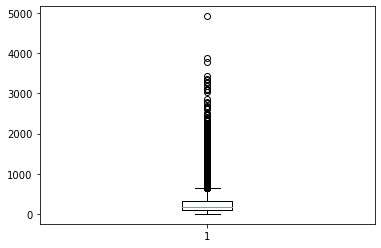

In [31]:
plt.boxplot(x=bank_data_2['duration'])
plt.show()

In [33]:
bank_data_2 = bank_data_2[(bank_data_2['duration']<1000)]

In [34]:
bank_data_2.shape

(42171, 15)

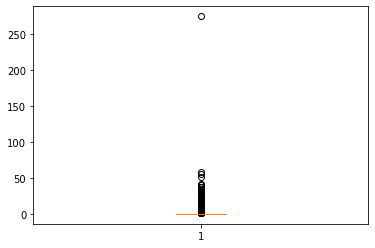

In [35]:
plt.boxplot(x=bank_data_2['previous'])
plt.show()

In [39]:
bank_data_2.groupby(by=['previous'])['previous'].count()

previous
0     34416
1      2598
2      1966
3      1070
4       679
5       439
6       262
7       189
8       124
9        88
10       60
11       60
12       41
13       36
14       19
15       20
16       13
17       15
18        5
19       11
20        8
21        4
22        6
23        8
24        5
25        4
26        2
27        4
28        2
29        3
30        2
32        1
35        1
37        2
38        2
40        1
41        1
51        1
55        1
58        1
Name: previous, dtype: int64

In [37]:
bank_data_2 = bank_data_2[bank_data_2['previous']<275]

In [38]:
bank_data_2.shape

(42170, 15)

## Model Building

In [42]:
X = bank_data_2.drop(labels='y',axis=1)
y = bank_data_2['y']

In [41]:
y.value_counts()

0    37764
1     4406
Name: y, dtype: int64

## Standard scalar

In [44]:
from sklearn.preprocessing import StandardScaler

In [49]:
std_scale = StandardScaler()
scaled_X = std_scale.fit_transform(X)
scaled_X =pd.DataFrame(scaled_X,columns=X.columns)

## Data splitting

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state=12,stratify=y)

## Model training and testing

In [63]:
from sklearn.linear_model import LogisticRegression
lin_model = LogisticRegression(class_weight={1:8}) # In output y,the 1 only 4406 values counts
lin_model.fit(X_train,y_train)
y_pred    = lin_model.predict(X_test)

## Evaluation

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [62]:
print('accuracy_score          :',round(accuracy_score(y_test,y_pred),5))
print('precison_score          :',round(precision_score(y_test,y_pred),5))
print('recall score            :',round(recall_score(y_test,y_pred),5))
print('confusion matrix        :\n',confusion_matrix(y_test,y_pred))

accuracy_score          : 0.79808
precison_score          : 0.30812
recall score            : 0.74915
confusion matrix        :
 [[6071 1482]
 [ 221  660]]


## Conclusion

### We get almost 80% accuracy

## ============================= End =====================================